<a href="https://colab.research.google.com/github/hemang-2001/Hello-world/blob/master/BiasVariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the necessary libraries:

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Now, we will load the data into a data frame and observe some rows to get insights into the data.

In [ ]:
data_file_path = '/content/diabetes.csv'
data_df = pd.read_csv(data_file_path)
data_df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


We need to predict the ‘Outcome’ column. Let us separate it and assign it to a target variable ‘y’. The rest of the data frame will be the set of input variables X.

In [ ]:
y = data_df["Outcome"].values
x = data_df.drop(["Outcome"],axis=1)

Now let’s scale the predictor variables and then separate the training and the testing data.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_df = ss.fit_transform(data_df)

#Divide into training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test

Since the outcomes are classified in a binary form, we will use the simplest K-nearest neighbor classifier(Knn) to classify whether the patient has diabetes or not.

However, how do we decide the value of ‘k’?

Maybe we should use k = 1 so that we will get very good results on our training data? That might work, but we cannot guarantee that the model will perform just as well on our testing data since it can get too specific
How about using a high value of k, say like k = 100 so that we can consider a large number of nearest points to account for the distant points as well? However, this kind of model will be too generic and we cannot be sure if it has considered all the possible contributing features correctly.
Let us take a few possible values of k and fit the model on the training data for all those values. We will also compute the training score and testing score for all those values.

Let us take a few possible values of k and fit the model on the training data for all those values. We will also compute the training score and testing score for all those values.

In [ ]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

To derive more insights from this, let us plot the training data(in red) and the testing data(in blue).

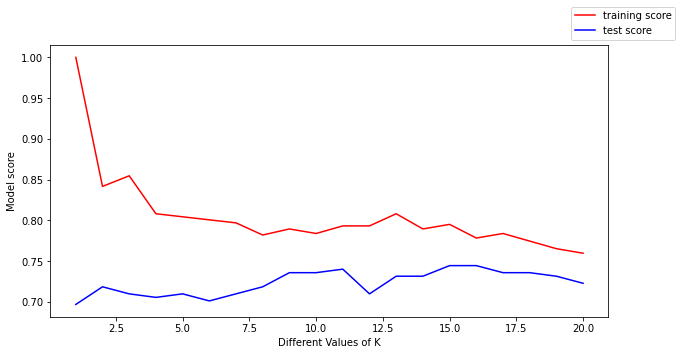

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

To calculate the scores for a particular value of k,

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 14)

#Fit the model
knn.fit(X_train,y_train)

#get the score
knn.score(X_test,y_test)

0.7316017316017316

We can make the following conclusions from the above plot:

For low values of k, the training score is high, while the testing score is low
As the value of k increases, the testing score starts to increase and the training score starts to decrease.
However, at some value of k, both the training score and the testing score are close to each other.
This is where Bias and Variance come into the picture.

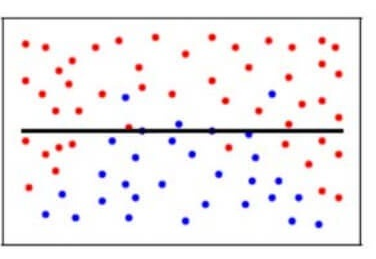

Mathematically, let the input variables be X and a target variable Y. We map the relationship between the two using a function f.

Therefore,

Y = f(X) + e

Here ‘e’ is the error that is normally distributed. The aim of our model f'(x) is to predict values as close to f(x) as possible. Here, the Bias of the model is:

Bias[f'(X)] = E[f'(X) – f(X)]

As I explained above, when the model makes the generalizations i.e. when there is a high bias error, it results in a very simplistic model that does not consider the variations very well. Since it does not learn the training data very well, it is called Underfitting.

 

What is a Variance?
Contrary to bias, the Variance is when the model takes into account the fluctuations in the data i.e. the noise as well. So, what happens when our model has a high variance?

The model will still consider the variance as something to learn from. That is, the model learns too much from the training data, so much so, that when confronted with new (testing) data, it is unable to predict accurately based on it.

Mathematically, the variance error in the model is:

Variance[f(x))=E[X^2]−E[X]^2

Since in the case of high variance, the model learns too much from the training data, it is called overfitting.

In the context of our data, if we use very few nearest neighbors, it is like saying that if the number of pregnancies is more than 3, the glucose level is more than 78, Diastolic BP is less than 98, Skin thickness is less than 23 mm and so on for every feature….. decide that the patient has diabetes. All the other patients who don’t meet the above criteria are not diabetic. While this may be true for one particular patient in the training set, what if these parameters are the outliers or were even recorded incorrectly? Clearly, such a model could prove to be very costly!

Additionally, this model would have a high variance error because the predictions of the patient being diabetic or not vary greatly with the kind of training data we are providing it. So even changing the Glucose Level to 75 would result in the model predicting that the patient does not have diabetes.

To make it simpler, the model predicts very complex relationships between the outcome and the input features when a quadratic equation would have sufficed. This is how a classification model would look like when there is a high variance error/when there is overfitting:

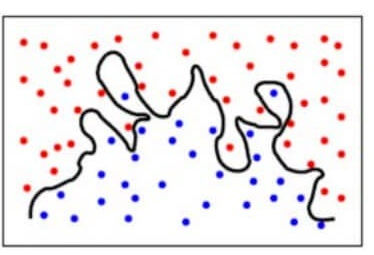

To summarise,

A model with a high bias error underfits data and makes very simplistic assumptions on it
A model with a high variance error overfits the data and learns too much from it
A good model is where both Bias and Variance errors are balanced
 

Bias-Variance Tradeoff
How do we relate the above concepts to our Knn model from earlier? Let’s find out!

In our model, say, for, k = 1, the point closest to the datapoint in question will be considered. Here, the prediction might be accurate for that particular data point so the bias error will be less.

However, the variance error will be high since only the one nearest point is considered and this doesn’t take into account the other possible points. What scenario do you think this corresponds to? Yes, you are thinking right, this means that our model is overfitting.

On the other hand, for higher values of k, many more points closer to the datapoint in question will be considered. This would result in higher bias error  and underfitting since many points closer to the datapoint are considered and thus it can’t learn the specifics from the training set. However, we can account for a lower variance error for the testing set which has unknown values.

To achieve a balance between the Bias error and the Variance error, we need a value of k such that the model neither learns from the noise (overfit on data) nor makes sweeping assumptions on the data(underfit on data). To keep it simpler, a balanced model would look like this:

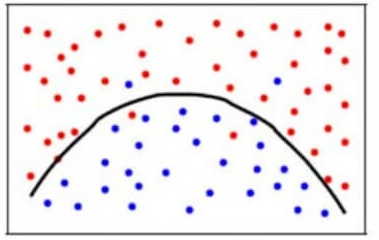

Though some points are classified incorrectly, the model generally fits most of the datapoints accurately. The balance between the Bias error and the Variance error is the Bias-Variance Tradeoff.

The following bulls-eye diagram explains the tradeoff better:

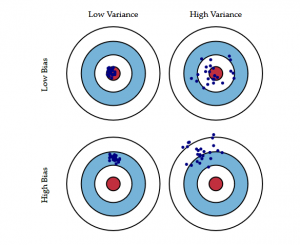

The center i.e. the bull’s eye is the model result we want to achieve that perfectly predicts all the values correctly. As we move away from the bull’s eye, our model starts to make more and more wrong predictions.

A model with low bias and high variance predicts points that are around the center generally, but pretty far away from each other. A model with high bias and low variance is pretty far away from the bull’s eye, but since the variance is low, the predicted points are closer to each other.

In terms of model complexity, we can use the following diagram to decide on the optimal complexity of our model.

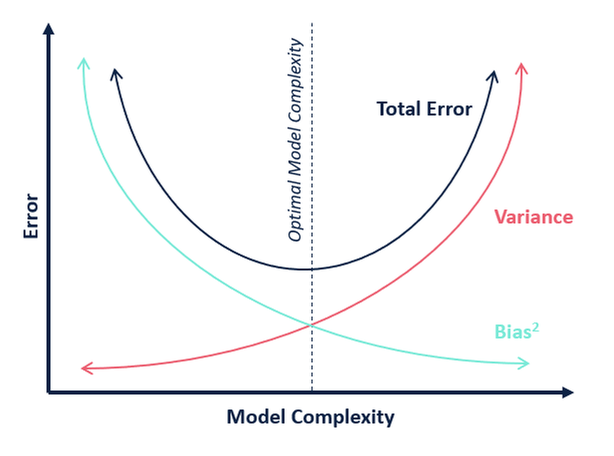

So, what do you think is the optimum value for k?

From the above explanation, we can conclude that the k for which

the testing score is the highest, and
both the test score and the training score are close to each other
is the optimal value of k. So, even though we are compromising on a lower training score, we still get a high score for our testing data which is more crucial – the test data is after all unknown data.

Let us make a table for different values of k to further prove this:

Bias and Variance Tradeoff : Training and testing score for different values of k

 

Conclusion
To summarize, in this article, we learned that an ideal model would be one where both the bias error and the variance error are low. However, we should always aim for a model where the model score for the training data is as close as possible to the model score for the testing data.

That’s where we figured out how to choose a model that is not too complex (High variance and low bias) which would lead to overfitting and nor too simple(High Bias and low variance) which would lead to underfitting.

Bias and Variance plays an important role in deciding which predictive model to use. 

Examples – Industries being impacted by AI Bias
The bias (intentional or unintentional discrimination) could arise in various use cases in industries such as some of the following:


*   Banking: Imagine a scenario when a valid applicant loan request is not approved. This could as well happen as a result of bias in the system introduced to the features and related data used for model training such as gender, education, race, location etc. In another example, imagine an applicant whose loan got approved although he is not suitable enough. In yet another example, imagine an applicant credit card application getting rejected although the applicant was a valid applicant who satisfied all the requirements for getting the credit card. It may so happen that the model used to classify the credit card application to be approved or rejected had an underlying bias owing to educational qualification of the applicants.
*   Insurance: Imagine a person being asked to pay a higher premium based on the predictions made by the model which took into account some of the attributes such as gender, race for making the predictions.
*   Employment: Imagine a machine learning model inappropriately filtering the candidates resumes based on the attributes such as race, color etc of the candidates. This could not only impact the employability of the right candidates but also results in the missed opportunity of the company to hire a great candidate.
*   Housing: Imagine a model with a high bias making incorrect predictions of house pricing. This may result in both, the house owner and the end user (the buyer) miss the opportunity related to buy-sell. The bias may get introduced due to data related to location, community, geography etc.
*   Fraud (Criminal/Terrorist): Imagine the model incorrectly classifying a person as the potential offender and getting him/her questioned for the offense which he/she did not do. That could be the predictable outcome of a model which may be biased towards race, religion, national origin etc. For example, in certain countries or geographies, a person of a specific religion or national origin is suspected to perform a certain kind of crime such as terrorism. Now, this becomes part of individual bias. This bias gets reflected in the model prediction.
*   Government: Imagine government schemes to be provided to a certain section of people and machine learning models being used to classify these people who would get benefits from these schemes. A bias would result in either some eligible people not getting the benefits (false positives) or some ineligible people getting the benefits (false negatives).
*   Education: Imagine an applicant admission application getting rejected due to underlying machine learning model bias. The bias may have resulted due to data using which model was trained.
*   Finance: In the financial industry, the model built with the biased data may result into predictions which could offend the Equal Credit Opportunity Act (fair lending) by not approving credit request of right applicants. And, the end users could challenge the same requiring the company to provide an explanation for not approving the credit request. The law, enacted in 1974, prohibits credit discrimination based on attributes such as race, color, religion, gender etc. While building models, product managers (business analysts) and data scientists do take steps to ensure that correct/generic data (covering different aspects) related to some of the above-mentioned features have been used to build (train/test) the model, the unintentional exclusion of some of the important features or data sets could result in bias.







